In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from lr_utils import load_dataset
%matplotlib inline

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
print(train_set_x_orig.shape)

(209, 64, 64, 3)


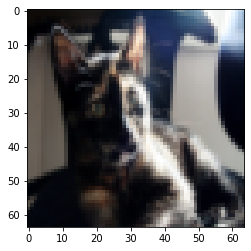

In [6]:
plt.imshow(train_set_x_orig[54])

In [23]:
train_set_x_orig = train_set_x_orig/255
test_set_x_orig = test_set_x_orig/255

In [24]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [77]:
model.fit(train_set_x_orig, train_set_y.T, epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 64ms/step - loss: 0.6903 - accuracy: 0.6555
Epoch 2/30
7/7 [==============================] - 0s 59ms/step - loss: 0.6701 - accuracy: 0.6555
Epoch 3/30
7/7 [==============================] - 0s 57ms/step - loss: 0.6422 - accuracy: 0.6555
Epoch 4/30
7/7 [==============================] - 0s 58ms/step - loss: 0.6544 - accuracy: 0.6555
Epoch 5/30
7/7 [==============================] - 0s 60ms/step - loss: 0.6354 - accuracy: 0.6555
Epoch 6/30
7/7 [==============================] - 0s 57ms/step - loss: 0.6258 - accuracy: 0.6555
Epoch 7/30
7/7 [==============================] - 0s 60ms/step - loss: 0.6073 - accuracy: 0.6555
Epoch 8/30
7/7 [==============================] - 0s 59ms/step - loss: 0.5961 - accuracy: 0.6555
Epoch 9/30
7/7 [==============================] - 0s 59ms/step - loss: 0.5896 - accuracy: 0.6555
Epoch 10/30
7/7 [==============================] - 0s 60ms/step - loss: 0.5757 - accuracy: 0.6555
Epoch 11/30
7/7 [============

In [79]:
y_pred = []
pred = model.predict(test_set_x_orig)
for i in pred:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(len(y_pred))

50


In [91]:
y_pred = np.array(y_pred)
y_pred.reshape(50,1)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0])

In [94]:
model.evaluate(test_set_x_orig,test_set_y.T)

2/2 [==============================] - 0s 8ms/step - loss: 1.3054 - accuracy: 0.5400


[1.3054481744766235, 0.5400000214576721]

In [92]:
test_set_y

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)